# Matplotlib Data Plotting

In previous notebooks, we created Figure and Axes objects, and proceeded to change their properties without plotting any actual data. In this notebook, we will learn how to make basic line and scatter plots.

## The Axes API
The [matplotlib documentation][1] has a nice layout of the Axes API. There are around 300 different calls you make with an Axes object. The API page categorizes and groups each method by its functionality. The first third (approximately) of the categories in the API are used to create plots.

The simplest and most common plots are found in the Basics category and include `plot`, `scatter`, `bar`, `pie`, and others.

[1]: https://matplotlib.org/api/axes_api.html

In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## The `plot` method - Creates line plots
The `plot` method's primary purpose is to create line plots. It does have the ability to create scatter plots as well, but that task is best reserved for `scatter`.

### Plotting 2D Data
The `plot` method is very flexible and can take a variety of different inputs. The following teaches a straightforward and consistent approach that is explicit and easy to read.

The first two arguments to the `plot` method can be the x and y coordinates of the data. Below, we use numpy arrays to hold our data. We simply plot the square of the x value.

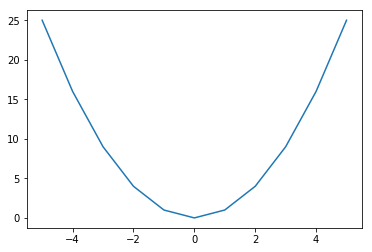

In [10]:
fig, ax = plt.subplots()

x = np.arange(-5, 6)
y = x ** 2
ax.plot(x, y)

### What was returned?
A list of `Line` objects were returned from our call to the `plot` method. The `plot` method can produce many lines in a single call to it, which is why it returns the results as a list.

## Formatting the line
The line can be formatted using many different parameters. Please see the documentation for the [Line object][1]. All of the possible parameters are available on that page. 

[1]: https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D

### Use Pandas to scrape the html table

In [7]:
from IPython.display import IFrame
IFrame('https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D', 800, 500)

### Changing properties of our line
Use the documentation above for details on how to change properties of a line. Let's begin by changing the line style.

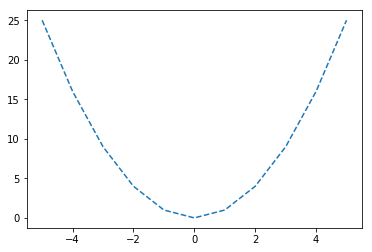

In [8]:
fig, ax = plt.subplots()
ax.plot(x, y, linestyle='--')

## Matplotlib Colors

There are many possible ways to identify a color in matplotlib. Read the [color documentation][1] to see all the ways to specify a color.

* an RGB or RGBA tuple of float values in [0, 1] (e.g., (0.1, 0.2, 0.5) or (0.1, 0.2, 0.5, 0.3)). RGBA is short for Red, Green, Blue, Alpha, where Alpha represents the opacity
* a hex RGB or RGBA string (e.g., '#0F0F0F' or '#0F0F0F0F');
* a string representation of a float value in [0, 1] for gray level (e.g., '0.5');
* one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}; **I don't use these because they are confusing**
* a X11/CSS4 color name - **I do use these**

### Web Colors
You can use any of the following colors that are available to web developers
![][2]

[1]: https://matplotlib.org/tutorials/colors/colors.html#sphx-glr-tutorials-colors-colors-py
[2]: images/named_colors.png

## Integration with Pandas - plotting real data
Matplotlib makes it simple to create plots when our data is in a DataFrame. Let's begin by reading in the flights data.

In [26]:
pd.options.display.max_columns = 100
flights = pd.read_csv('../data/flights.csv')
flights.head()

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,2015,1,1,4,WN,1908,N8324A,LAX,SLC,1625,1723.0,58.0,10.0,1733.0,100.0,107.0,94.0,590,2007.0,3.0,1905,2010.0,65.0,0,0,NaN,31.0,0.0,0.0,34.0,0.0
1,2015,1,1,4,UA,581,N448UA,DEN,IAD,823,830.0,7.0,11.0,841.0,190.0,170.0,154.0,1452,1315.0,5.0,1333,1320.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,MQ,2851,N645MQ,DFW,VPS,1305,1341.0,36.0,18.0,1359.0,108.0,107.0,85.0,641,1524.0,4.0,1453,1528.0,35.0,0,0,NaN,0.0,0.0,35.0,0.0,0.0
3,2015,1,1,4,AA,383,N3EUAA,DFW,DCA,1555,1602.0,7.0,13.0,1615.0,160.0,146.0,126.0,1192,1921.0,7.0,1935,1928.0,-7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,WN,3047,N560WN,LAX,MCI,1720,1808.0,48.0,6.0,1814.0,185.0,176.0,166.0,1363,2300.0,4.0,2225,2304.0,39.0,0,0,NaN,0.0,0.0,17.0,22.0,0.0


### Let's first find the average delay for each month
Let's run a calculation before plotting, such as finding the average delay for each month.

In [63]:
month_delay = flights.groupby('month', as_index=False).agg({'departure_delay': ['mean', 'size']})
month_delay.columns = ['month', 'average delay', 'count']
month_delay

,month,average delay,count
0,1,11.044667,5003
1,2,11.314085,4608
2,3,10.895663,5485
3,4,8.872772,5326
4,5,11.241133,5545
5,6,15.926112,5672
6,7,12.934268,5754
7,8,10.596212,5635
8,9,5.631609,5235
9,11,8.632673,5098


### Make a line plot with a DataFrame 
Matplotlib simplifies the process by providing a **`data`** parameter. Set this equal to the name of our above DataFrame. Pass the column names as strings as the first two arguments in the **`plot`** method.

Text(0.5, 1.0, 'Average Delay')

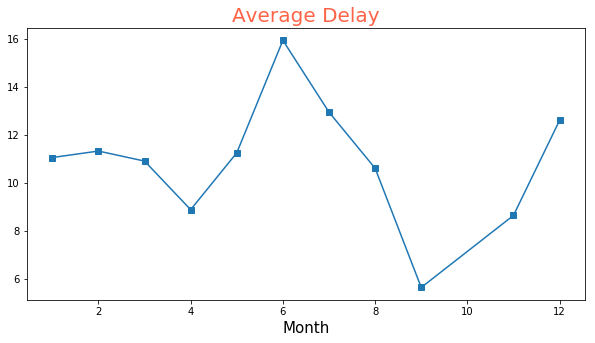

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot('month', 'average delay', data=month_delay, marker='s')
ax.set_xlabel('Month', fontsize=15)
ax.set_title('Average Delay', fontsize=20, color='tomato')

### Grayscale
Use a **string** with a number between 0 and 1 for grayscale.

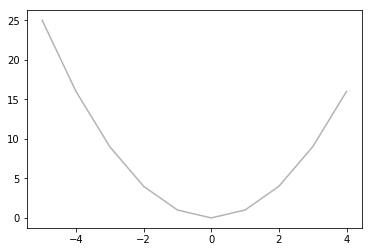

In [64]:
fig, ax = plt.subplots()
ax.plot(x, y, color='.7')

## Markers
There are a few dozen [styles for markers][1]. These are plotted on every point. Use a string to reference the one you want.

[1]: https://matplotlib.org/api/markers_api.html

In [35]:
IFrame('https://matplotlib.org/api/markers_api.html', 800, 600)

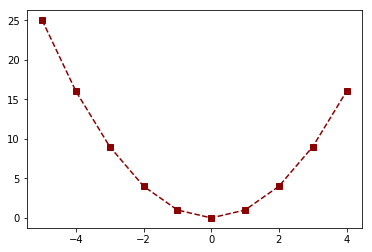

In [36]:
fig, ax = plt.subplots()
ax.plot(x, y, color='darkred', linestyle='--', marker='s')

### A few more parameters

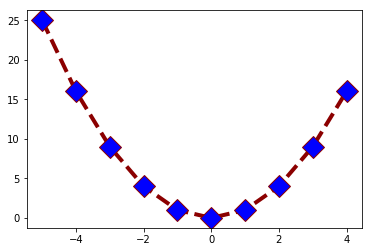

In [37]:
fig, ax = plt.subplots()
ax.plot(x, y, color='darkred',
              linestyle='--',
              linewidth=4,
              marker='D',
              markerfacecolor='blue',
              markersize=15)

## Most common Plots
Visit the [Axes API][1] to see the most common plotting methods.

[1]: https://matplotlib.org/api/axes_api.html

In [38]:
IFrame('https://matplotlib.org/api/axes_api.html', 800, 600)

## Univariate Analysis
These are the primary plots that you will make from your Axes. We just plotted a line with **`plot`** in our above example. Let's see a few more plots in action.

{'whiskers': [<matplotlib.lines.Line2D at 0x3b2c2dadd8>,
 'caps': [<matplotlib.lines.Line2D at 0x3b2c03f780>,
 'boxes': [<matplotlib.lines.Line2D at 0x3b2c96cf98>],
 'medians': [<matplotlib.lines.Line2D at 0x3b2c03fe10>],
 'fliers': [<matplotlib.lines.Line2D at 0x3b2c03fef0>],
 'means': []}

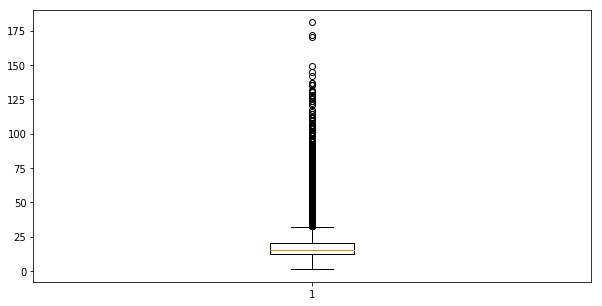

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.boxplot(x=flights['taxi_out'].dropna())

{'whiskers': [<matplotlib.lines.Line2D at 0x3b2c1d62e8>,
 'caps': [<matplotlib.lines.Line2D at 0x3b2c1d6978>,
 'boxes': [<matplotlib.lines.Line2D at 0x3b2caa8fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x3b2c1d6da0>],
 'fliers': [<matplotlib.lines.Line2D at 0x3b2c5b0390>],
 'means': []}

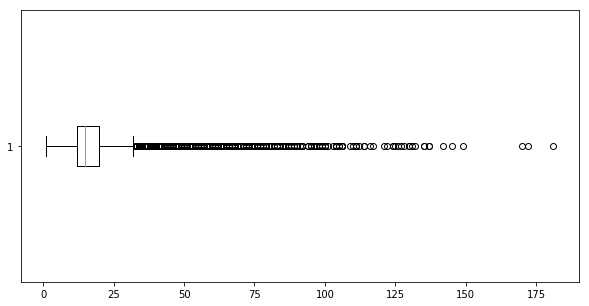

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.boxplot(x=flights['taxi_out'].dropna(), vert=False)

## Plotting dates
The **`plot_date`** function creates a line or scatter plot with dates in the x-axis.

### Read in the bikes dataset

In [41]:
bikes = pd.read_csv('../data/bikes.csv', parse_dates=['starttime', 'stoptime'])
bikes.head()

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_name,latitude_end,longitude_end,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events
0,7147,Subscriber,Male,2013-06-28 19:01:00,2013-06-28 19:17:00,993,Lake Shore Dr & Monroe St,41.881050,-87.616970,11.0,Michigan Ave & Oak St,41.900960,-87.623777,15.0,73.9,10.0,12.7,-9999.0,mostlycloudy
1,7524,Subscriber,Male,2013-06-28 22:53:00,2013-06-28 23:03:00,623,Clinton St & Washington Blvd,41.883380,-87.641170,31.0,Wells St & Walton St,41.899930,-87.634430,19.0,69.1,10.0,6.9,-9999.0,partlycloudy
2,10927,Subscriber,Male,2013-06-30 14:43:00,2013-06-30 15:01:00,1040,Sheffield Ave & Kingsbury St,41.909592,-87.653497,15.0,Dearborn St & Monroe St,41.881320,-87.629521,23.0,73.0,10.0,16.1,-9999.0,mostlycloudy
3,12907,Subscriber,Male,2013-07-01 10:05:00,2013-07-01 10:16:00,667,Carpenter St & Huron St,41.894556,-87.653449,19.0,Clark St & Randolph St,41.884576,-87.631890,31.0,72.0,10.0,16.1,-9999.0,mostlycloudy
4,13168,Subscriber,Male,2013-07-01 11:16:00,2013-07-01 11:18:00,130,Damen Ave & Pierce Ave,41.909396,-87.677692,19.0,Damen Ave & Pierce Ave,41.909396,-87.677692,19.0,73.0,10.0,17.3,-9999.0,partlycloudy


### Examine relationship between date and temperature

In [42]:
bikes['temperature'].describe()

count    50089.000000
mean        62.608237
std         48.151252
min      -9999.000000
25%         52.000000
50%         66.900000
75%         75.900000
max         96.100000
Name: temperature, dtype: float64

In [43]:
bikes['temperature'].sort_values().head()

27168   -9999.0
35073      -8.0
2064       -8.0
10262      -6.0
35074      -6.0
Name: temperature, dtype: float64

Remove bad temperature data and sample 2% of the bikes dataset, which will help keep the number of plotted points from overwhelming the graph.

In [46]:
bikes = bikes[bikes['temperature'] > -10]
bikes2 = bikes.sample(frac=.02)

Call the **`plot_date`** function.

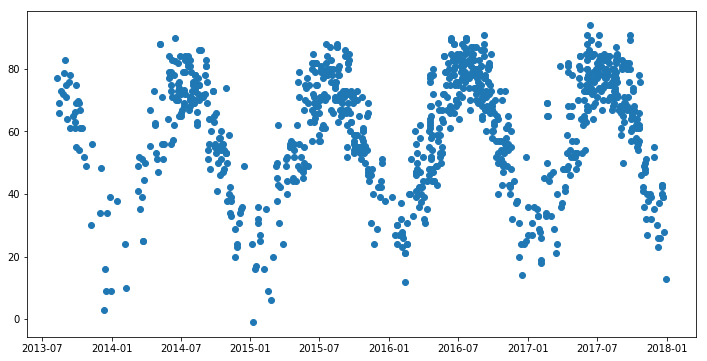

In [49]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot_date('starttime', 'temperature', data=bikes2)

## Plotting the Number of Riders per Day
Let's find the number of riders each day. We need to group by each day.

In [50]:
temperature_count = bikes.resample('D', on='starttime').size()
temperature_count = temperature_count.reset_index()
temperature_count.head()

,starttime,0
0,2013-06-28,2
1,2013-06-29,0
2,2013-06-30,1
3,2013-07-01,3
4,2013-07-02,1


In [54]:
temperature_count.columns = ['starttime', 'count']
temperature_count.head()

,starttime,count
0,2013-06-28,2
1,2013-06-29,0
2,2013-06-30,1
3,2013-07-01,3
4,2013-07-02,1


Text(0.5, 1.0, 'Rider Count per Day')

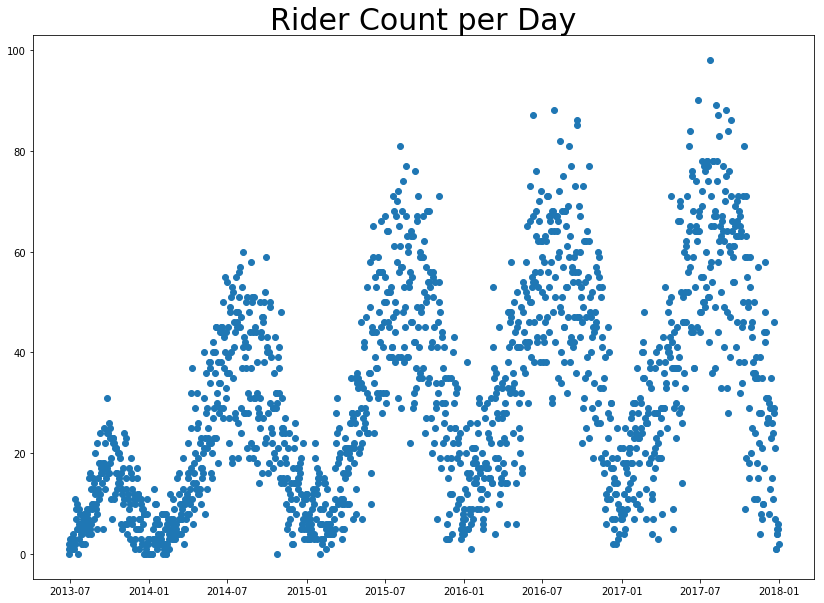

In [52]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot_date('starttime', 'count', data=temperature_count)
ax.set_title('Rider Count per Day', fontsize=30)

##  Scatterplots 
Although we have already created some scatterplots above, Matplotlib has a special **`scatter`** function that allows you to set both the color and size of each point individually based on the value of a different variable.

In [55]:
housing = pd.read_csv('../data/housing.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [56]:
housing.shape

(1460, 81)

### Take a sample of the data
Although matplotlib can handle several thousand plotted points, our scatter plot would be a bit too crowded by plotting all the points. Let's use the same method to select a random subset of rows.

In [57]:
housing_sample = housing.sample(200)

### Use OverallQual as the size of each point
We will size our points based on the square of the OverallQual which are integers between 0 and 10.

In [58]:
housing_sample['OverallQual2'] = housing_sample['OverallQual'] ** 2

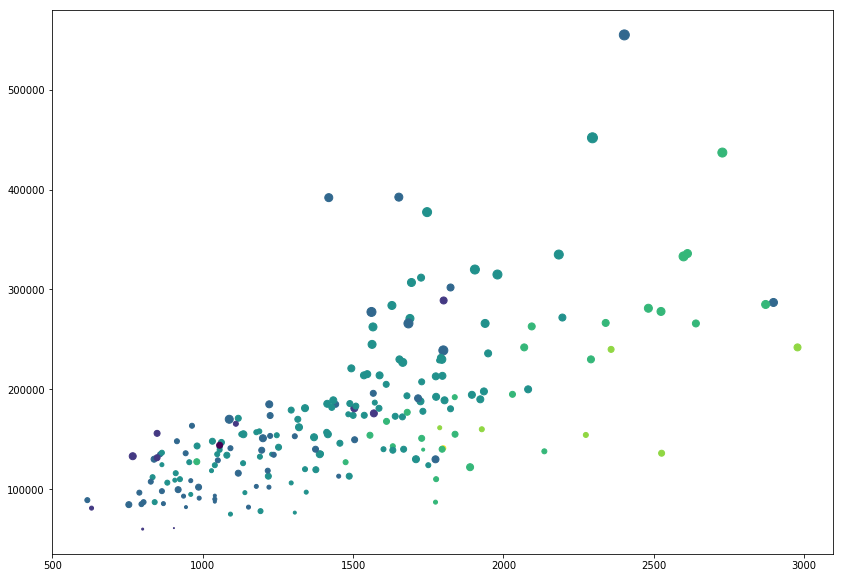

In [59]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.scatter('GrLivArea', 'SalePrice', s='OverallQual2', c='BedroomAbvGr', data=housing_sample)

## Creating a Legend
In our above plot it is impossible to determine what the colors mean. No legend is present to inform us of the number of bedrooms. Unfortunately, this is not a straight forward task in Matplotlib. We must plot each group that we want to form a legend with as a separate call to the `scatter` method. Then we can use the `label` parameter to name the legend.

### Boolean Selection
We must use a loop to select data for each unique bedroom.

In [60]:
housing['BedroomAbvGr'].unique()

array([3, 4, 1, 2, 0, 5, 6, 8], dtype=int64)

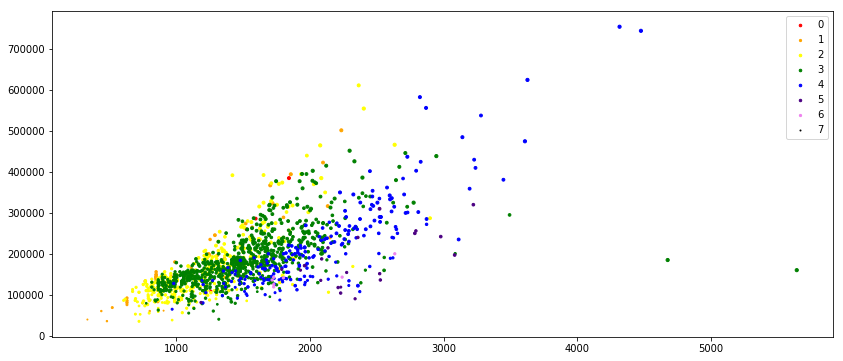

In [61]:
fig, ax = plt.subplots(figsize=(14, 6))
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'black']
for i in range(8):
    filt = housing['BedroomAbvGr'] == i
    housing_temp = housing[filt]
    ax.scatter('GrLivArea', 'SalePrice', s='OverallQual', color=colors[i], data=housing_temp, label=i)
ax.legend();

## Exercises

### Exercise 1
<span  style="color:green; font-size:16px">Create a Figure with three Axes using **`plt.subplots`**. Use **`np.linspace`** to create a one dimensional array of data from -5 to 5 of length 100 and store this to **`x`**. In each of three Axes, plot take some mathematical function of **`x`** to create **`y`** values in a line plot. For instance, you can take the square root of **`x`**.</span>

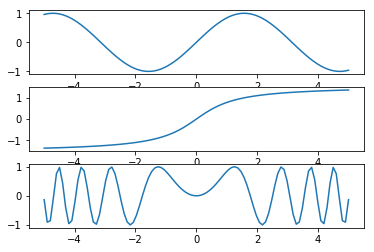

In [89]:
%matplotlib inline
import numpy as ny
import pandas as ps
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 1)
lines = ny.linspace(-5, 5, 100)
ax1 = ax[0]
ax2 = ax[1]
ax3 = ax[2]
ax1.plot(lines, ny.sin(lines))
ax2.plot(lines, ny.arctan(lines))
ax3.plot(lines, ny.sin(lines ** 2))

### Exercise 2
<span  style="color:green; font-size:16px">Use **`np.random.rand`** to create two arrays, **`x`** and **`y`** that are each 100 units in length. Make a scatter plot of the data. Make the size of the markers proportional to the ratio of y to x. Make the color proportional to y. For scatter plots, use the parameter **`c`** to control the color with a number. The parameter **`s`** controls the size. Set the title as well.</span>

In [69]:
arr1 = ny.random.rand(100)
arr2 = ny.random.rand(100)

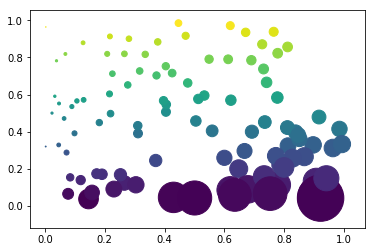

In [82]:
figu1,ax1 = plt.subplots(figsize=(6,4))
ax1.scatter(arr1,arr2,s=arr1/arr2 * 100,c=arr2)

### Exercise 3
<span  style="color:green; font-size:16px">Read in the college dataset and set the index to the institution name. Complete the following tasks:


* Convert the median earnings within 10 years (md_earn_wne_p10) column to numeric
* Create a column for the total SAT score
* Select just the columns for SAT total, ugds, relaffil and md_earn_wne_p10 into another DataFrame called `college_samp`. Continue with this DataFrame for the rest of the exercise.
* Drop any rows with missing values
* Randomly sample 10% of the DataFrame and assign it back to itself.
* Call the `map` method on the `relaffil` column. Pass it a dictionary to convert the values to color names. Assign the result to the column `color`
* Take the square root of the ugds column and assign it to the column `size`. 
* Create a scatterplot of the total SAT scores vs the md_earn_wne_p10 column. Color and size each point with their respective columns.
* Extra Credit: Annotate the school with the largest population as it is done [in this example](https://matplotlib.org/users/annotations.html) </span>

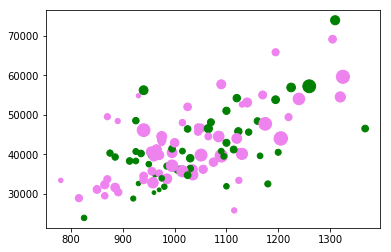

In [126]:
df = ps.read_csv('../data/college.csv')
df.set_index('instnm')
df['md_earn_wne_p10'] = ps.to_numeric(df['md_earn_wne_p10'],errors='coerce')
df['sattotal'] = df['satmtmid'] + df['satvrmid']
exDf = df[['sattotal','ugds','relaffil','md_earn_wne_p10']]
exDf.dropna()
exDf = exDf.sample(frac=0.1)
exDf['color'] = exDf['relaffil'].map({0:'violet',1:'Green'})
exDf['size'] = exDf['ugds'] ** 0.5;
fig,ax = plt.subplots(figsize=(6,4))
ax.scatter('sattotal','md_earn_wne_p10',data=exDf,c='color',s='size')


### Exercise 4
<span  style="color:green; font-size:16px">Read in the employee dataset and select the `salary` column as a Series, drop the missing values, and assign it to a variable. Read about the `pd.cut` function and create categories that span 25k from 0 to 300k. Save this result as a Series and find the frequency of each category. Then take that result and create a `pie` chart with labels.</span>

In [130]:
employee = ps.read_csv('../data/employee.csv')
employee.head()

,title,dept,salary,race,gender,hire_date
0,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Male,2015-02-03
1,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Male,1982-02-08
2,SENIOR POLICE OFFICER,Houston Police Department-HPD,66614.0,Black,Male,1984-11-26
3,ENGINEER,Public Works & Engineering-PWE,71680.0,Asian,Male,2012-03-26
4,CARPENTER,Houston Airport System (HAS),42390.0,White,Male,2013-11-04


([<matplotlib.patches.Wedge at 0x3b3d43c3c8>,
 [Text(0.1344617231733968, 1.0917509079461492, '(50000, 75000]'),
  Text(-0.5786853782020147, -0.9354802152131233, '(25000, 50000]'),
  Text(0.96195556816338, -0.5335180267614851, '(75000, 100000]'),
  Text(1.0943635110857286, -0.11121378333694365, '(100000, 125000]'),
  Text(1.0989080199579964, -0.04900167009394921, '(175000, 200000]'),
  Text(1.099557748266595, -0.03118907223524899, '(125000, 150000]'),
  Text(1.0998894305570903, -0.015596170965976677, '(150000, 175000]'),
  Text(1.0999796905835366, -0.006684332707707228, '(200000, 225000]'),
  Text(1.0999977432105457, -0.0022282126708155717, '(0, 25000]'),
  Text(1.0999999999999919, -1.3436902586447112e-07, '(250000, 275000]'),
  Text(1.0999999999999919, -1.3436902586447112e-07, '(225000, 250000]')])

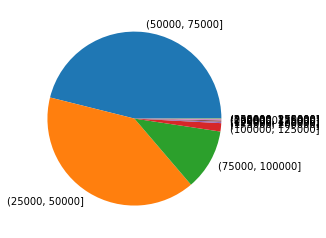

In [150]:
sal = ps.cut(employee['salary'].dropna(),bins=range(0,300000,25000))
df_cat = sal.value_counts().reset_index()
df_cat.columns=['range','count']
df_cat
plot.pie('count',data=df_cat,labels='range')